In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv("newsmsspam.csv")

In [5]:
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
dataset.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
dataset['Category']=dataset['Category'].map({'spam':1,'ham':0})

In [10]:
dataset

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Category', ylabel='count'>

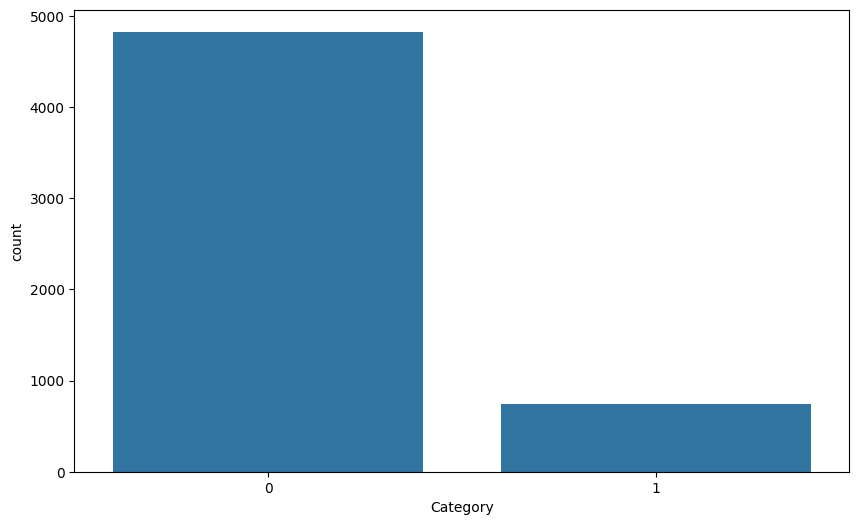

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x="Category",data=dataset)

In [13]:
only_spam=dataset[dataset["Category"]==1]

In [14]:
only_spam

,Category,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [15]:
print("number of spamSMS =",len(only_spam))
print("number of hamSMS =",len(dataset)-len(only_spam))

number of spamSMS = 747
number of hamSMS = 4825


In [16]:
diff=int((dataset.shape[0] - only_spam.shape[0])/only_spam.shape[0])

In [17]:
diff

6

In [18]:
for i in range(0,diff-1):
    dataset=pd.concat([dataset,only_spam])

dataset.shape

(9307, 2)

In [19]:
for i in range (diff):
    dataset=pd.concat([dataset,only_spam])

In [20]:
dataset

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


<Axes: xlabel='Category', ylabel='count'>

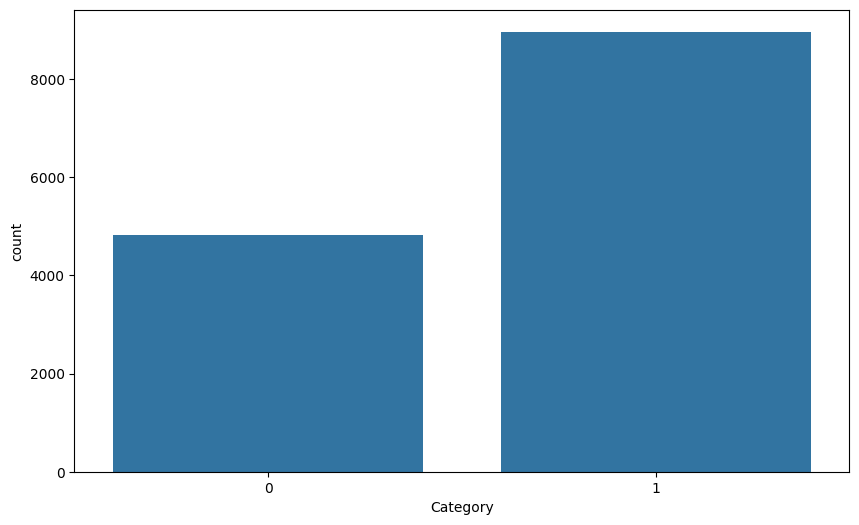

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x="Category",data=dataset)

In [22]:
dataset['word count']=dataset['Message'].apply(lambda x : len(x.split()))
dataset

,Category,Message,word count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


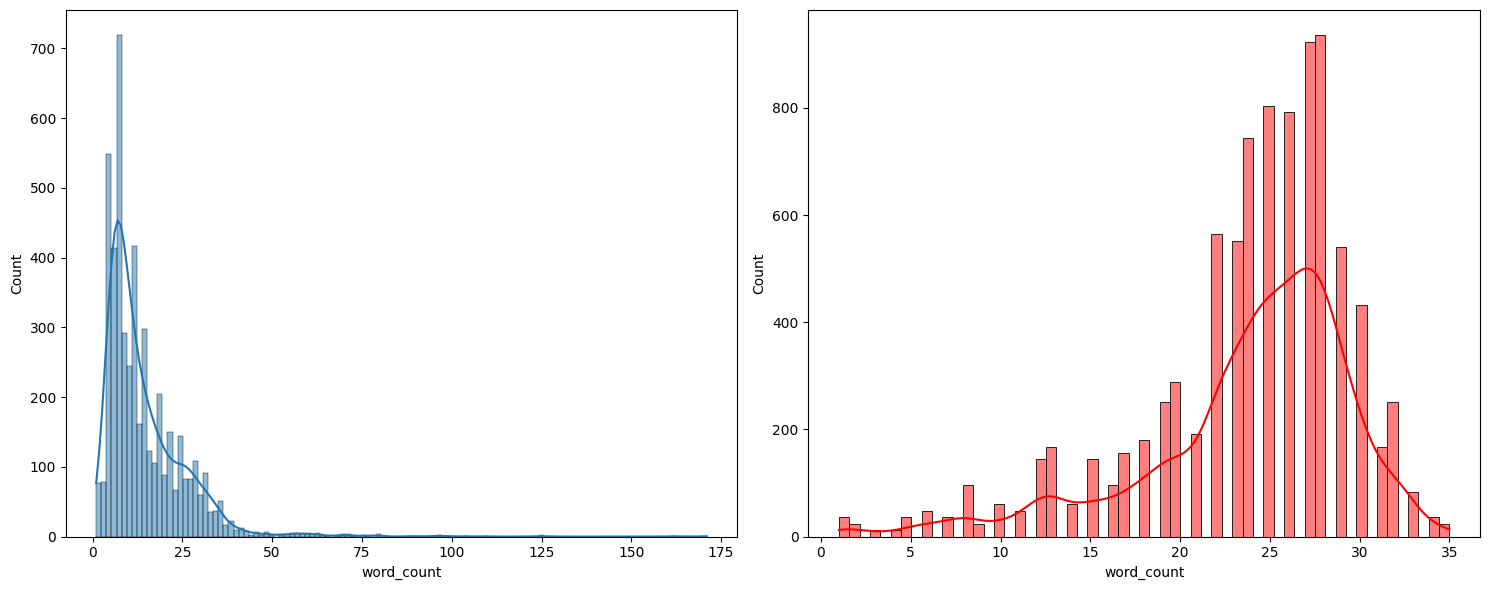

In [24]:
dataset['word_count'] = dataset['Message'].apply(lambda x: len(x.split()))
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset["Category"]==0].word_count,kde=True)

plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset["Category"]==1].word_count,color="red",kde=True)

plt.tight_layout()
plt.show()

In [25]:
def currency(data):
    currency_symbols=['€' ,'$' ,'¥' ,'£' ,'₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [26]:
dataset["contains_currency_symbols"]=dataset["Message"].apply(currency)

In [27]:
dataset

,Category,Message,word count,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,20,0
1,0,Ok lar... Joking wif u oni...,6,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,28,0
3,0,U dun say so early hor... U c already then say...,11,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,13,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,28,0


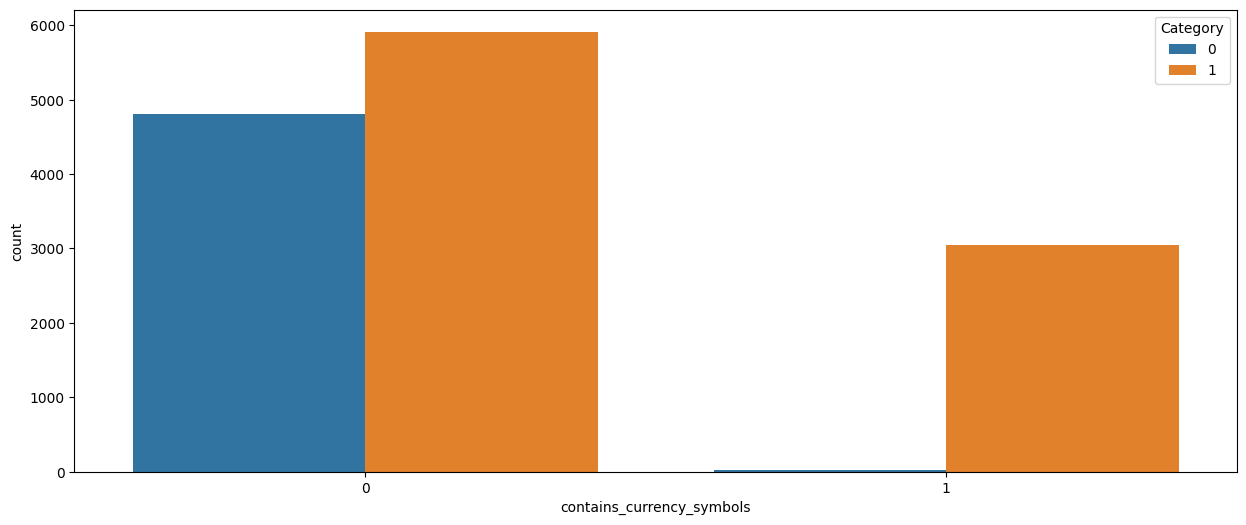

In [28]:
plt.figure(figsize=(15,6))

sns.countplot(x="contains_currency_symbols",hue="Category",data=dataset)
plt.show()


In [29]:
def numbers(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [30]:
dataset["contains_numbers"]=dataset['Message'].apply(numbers)

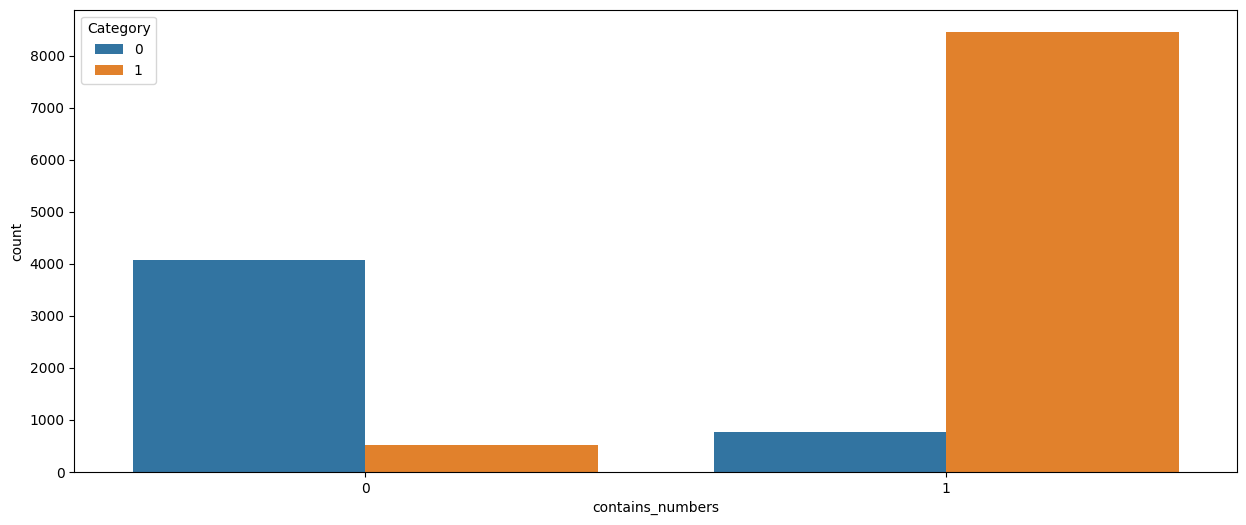

In [31]:
plt.figure(figsize=(15,6))

sns.countplot(x="contains_numbers",hue="Category",data=dataset)
plt.show()

In [32]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [33]:
stopwords = nltk. corpus. stopwords.words("english")
wnl = nltk. stem. WordNetLemmatizer()

In [34]:
corpus=[]

for sms in list(dataset.Message):
    Message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    Message=Message.lower()
    words=Message.split()
    filtered_words=[word for word in words if word not in stopwords]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    Message=' '.join(lemm_words)
    corpus.append (Message)

In [35]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
tfidf.fit(corpus)
vectors= tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [39]:
x=pd.DataFrame(vectors,columns=feature_names)
y=dataset['Category']

In [40]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: Category, Length: 13789, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(vectors, columns=feature_names)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
X_test

,ac,access,account,activate,address,admirer,age,already,also,amp,...,xx,xxx,ya,yeah,year,yes,yet,yo,yr,zed
9721,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8226,0.0,0.356403,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1557,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7426,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3070,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13098,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8815,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11815,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.253458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11626,0.0,0.000000,0.306405,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9144307469180566

In [50]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

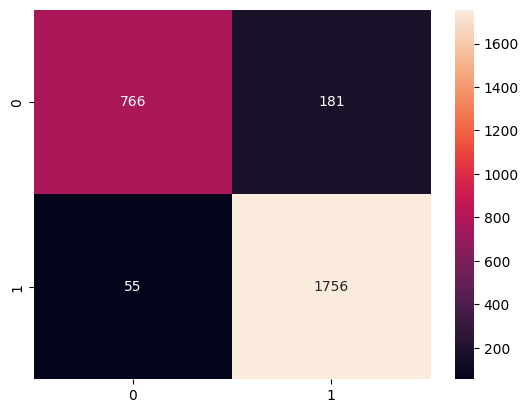

In [51]:
sns.heatmap(cm,annot=True,fmt='g')

In [52]:
def predict_spam (sms) :
    Message = re. sub(pattern='[^a-zA-Z]', repl=' ' , string=sms)
    Message = Message. lower ()
    words = Message.split()
    filtered_words = [word for word in words if word not in stopwords]
    lemm_words = [wnl. lemmatize(word) for word in filtered_words]
    Message = ' '.join(lemm_words)
    temp = tfidf. transform ([Message]) .toarray()
    return mnb. predict (temp)

In [53]:
sample_message = 'IMPORTANT - You could be entitled up to €3,160 in compensation from mis-sold PPI on a credit card or loan.'
if predict_spam (sample_message) :
    print('Gotcha! This is a SPAM message. ')
else:
    print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [54]:
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1, 300 will be drafted from your wells !'
if predict_spam (sample_message) :
    print( 'Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message. ')

This is a HAM (normal) message. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
